# Hunter Nixon Smith

## Research question/interests
**What effects can we visualize from the transition of in-person to online/hybrid then back to inperson/hybrid courses during the COVID-19 pandemic impact the grade distribution of individual courses?**

Briefly describe your research question or interests here.
For this project my reasearch will focus on how grade distribution, mean grades and analyze how number students in a class changed from a pre covid era to a shift to online and hybrid classes and then into 2021 with a blend of hybrid, online, and in person courses. I am interested in understanding what the shift from  remote and hybrid learning has affected the academic performance of students in a varitety subjects. After completion of the project, my research aims to provide possible insights into the challenges and benefits that remote and hybrid learning, can have on individuals and insructors. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from code import project_functions1 as pf# This is called a relative import
df = project_functions1.load_and_process('../analysis/code/project_functions1.py')

ImportError: cannot import name 'project_functions1' from 'code' (/Users/hunter/miniconda3/lib/python3.10/code.py)

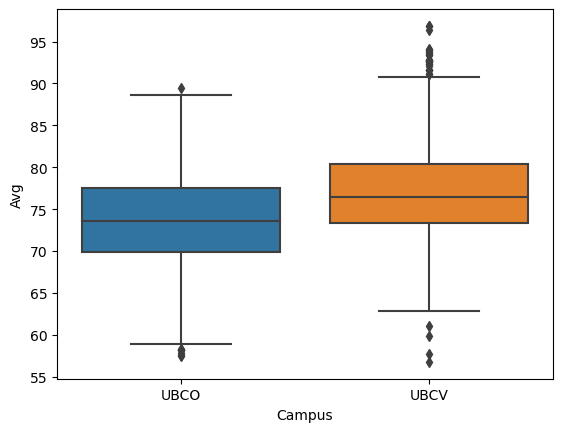

In [ ]:
Total_Grade_Average = sns.boxplot(x="Campus", y="Avg", data=df)
# this graph shows the totoal average grade over the past 4 years in all poltical science, philosphy, and economic courses.
# This boxplot shows the mean and the upper and lower quartile and then the outliers. 

<matplotlib.legend.Legend>

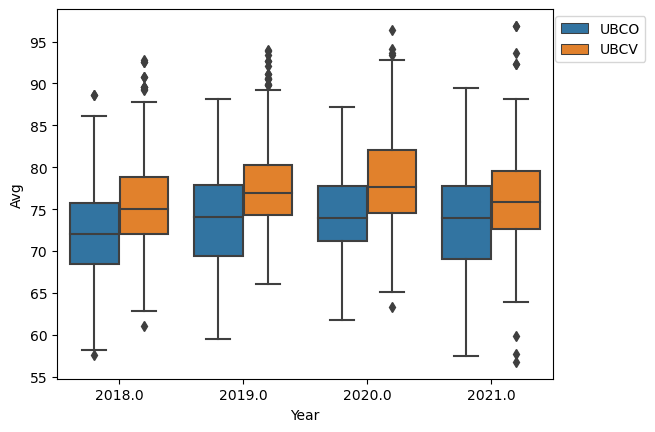

In [ ]:
Total_Average_By_Year = sns.boxplot(x="Year", y="Avg", hue= 'Campus', data=df)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
# This boxplot Shows the average by campus and shows the change in average from each year. 



/var/folders/jv/5s54vhx94sv6j886flhyx7qr0000gn/T/ipykernel_94657/1858103625.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Campus_Subject'] = data['Campus'] + '_' + data['Subject']


<matplotlib.legend.Legend>

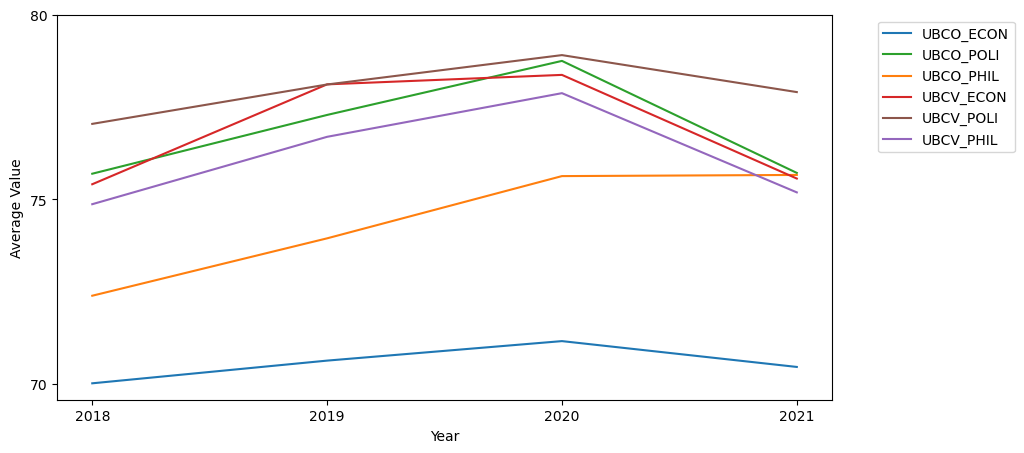

In [ ]:
# set the figure size
plt.figure(figsize=(10, 5))
#set colour
colours = {'UBCO_ECON': '#1f77b4',
          'UBCO_PHIL': '#ff7f0e',
          'UBCO_POLI': '#2ca02c',
          'UBCV_ECON': '#d62728',
          'UBCV_PHIL': '#9467bd',
          'UBCV_POLI': '#8c564b'}

# filter the data
types = ['ECON', 'PHIL', 'POLI']
data = df[df['Subject'].isin(types)]

# add a new column to the data for campus + subject
data['Campus_Subject'] = data['Campus'] + '_' + data['Subject']

# plot the lines
sns.lineplot(x='Year', y='Avg', hue='Campus_Subject', data=data, palette=colours, errorbar=None)

# set the y-axis ticks and label
plt.yticks([70, 75, 80])
plt.ylabel('Average Value')

# set the x-axis ticks
plt.xticks([2018, 2019, 2020, 2021])

# add the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# This lineplot shows the average of political science, philosophy, and economic courses. 
# It then splits each course by campus and creates a line graph for each of the courses.


In [ ]:
file_path = '../data/raw/rawdata.csv'
df = pd.read_csv(file_path)


In [ ]:
columns_to_drop = ['Professor', 'Title', 'Detail']
df = df.drop(columns=columns_to_drop)


In [ ]:
new_file_path = '../data/processed/processeddata.csv'
df.to_csv(new_file_path, index=False)

<AxesSubplot:xlabel='Avg', ylabel='Subject'>

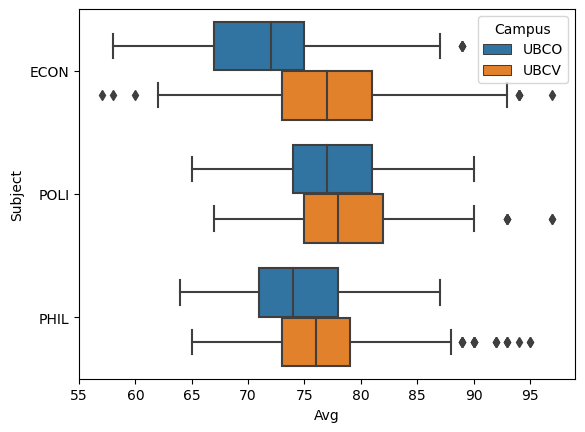

In [ ]:
sns.boxplot(data=df, x='Avg', y='Subject', hue='Campus')
# Shows outliars amount of outliars in each subject by campus


In [ ]:
df = pd.read_csv('../data/processed/processeddata.csv')

def preprocess_data(df, columns_to_drop):
    processed_df = (
        df
        .drop(columns=columns_to_drop)  # Drop unnecessary columns
        .query("Year >= 2020 & Year < 2021")  # Filter data for years 2020
        .groupby(['Year', 'Subject', 'Course'])  # Group data by year, subject, and course
        .agg({
            'Avg': ['mean', 'median'],  # Calculate the mean and median of the average grades
            'Median': ['mean', 'median'],  # Calculate the mean and median of the median grades
            'Percentile (25)': ['mean', 'median'],  # Calculate the mean and median of the 25th percentile
            'Percentile (75)': ['mean', 'median'],  # Calculate the mean and median of the 75th percentile
        })
        .round(0)  # Round the summary statistics to the nearest whole number
        .sort_values(by=['Year', 'Subject', 'Course'])  # Sort the DataFrame by year, subject, and course
        .reset_index()  # Reset the index
    )
# Wrap your method chain in a function
    return processed_df
# Load the dataset
df = pd.read_csv('../data/processed/processeddata.csv')


# Define the columns to drop
columns_to_drop = ['Section']

# Call the preprocess_data function
processed_df = preprocess_data(df, columns_to_drop)

# Print the processed DataFrame
processed_df


Year Subject Course   Avg        Median        Percentile (25)         \
                            mean median   mean median            mean median   
0    2020.0    ECON  101.0  72.0   73.0   15.0   15.0            99.0   99.0   
1    2020.0    ECON  102.0  72.0   72.0   16.0   16.0            97.0   98.0   
2    2020.0    ECON  204.0  64.0   64.0   16.0   16.0            99.0   99.0   
3    2020.0    ECON  205.0  70.0   70.0   13.0   13.0            98.0   98.0   
4    2020.0    ECON  210.0  77.0   77.0    8.0    8.0            93.0   93.0   
..      ...     ...    ...   ...    ...    ...    ...             ...    ...   
217  2020.0    POLI  460.0  83.0   83.0    9.0    9.0            90.0   90.0   
218  2020.0    POLI  463.0  83.0   82.0    8.0    8.0            90.0   90.0   
219  2020.0    POLI  464.0  83.0   83.0    9.0    9.0            93.0   93.0   
220  2020.0    POLI  465.0  82.0   82.0    7.0    7.0            96.0   96.0   
221  2020.0    POLI  492.0  86.0   86.0    4.0    4.0            92.0   92.0   

    Percentile (75)         
               mean median  
0               7.0    0.0  
1               6.0    0.0  
2               4.0    4.0  
3              18.0   18.0  
4              56.0   56.0  
..              ...    ...  
217            43.0   43.0  
218            60.0   54.0  
219            59.0   61.0  
220            64.0   64.0  
221            75.0   75.0  

[222 rows x 11 columns]